In [4]:
%matplotlib inline

%load_ext autoreload
import os,sys
import pandas as pd
import seaborn as sns
import numpy as np
import progressbar
import dill as pickle
from datetime import datetime
import matplotlib as mpl
import matplotlib.pyplot as plt
import logging

sys.path.append("../")

print(sys.path)

%autoreload 2
from src.pySRM.pysrm.regions import SpectraRegion, ProteinWeights
%autoreload 2
from src.pySRM.pysrm.imzml import IMZMLExtract
%autoreload 2
from src.pySRM.pysrm.comparative import CombinedSpectra

loggers = [logging.getLogger(name) for name in logging.root.manager.loggerDict]
for logger in loggers:
    logger.setLevel(logging.INFO)

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload
['/mnt/f/dev/git/pyIMS/examples', '/usr/lib/python38.zip', '/usr/lib/python3.8', '/usr/lib/python3.8/lib-dynload', '', '/usr/local/lib/python3.8/dist-packages', '/usr/local/lib/python3.8/dist-packages/mpld3-0.3.1.dev1-py3.8.egg', '/usr/lib/python3/dist-packages', '/usr/local/lib/python3.8/dist-packages/IPython/extensions', '/home/mjoppich/.ipython', '../', '../']


In [5]:
! ls /mnt/s/data/globus_win/

d9e3c80a32567cde9b61e38ce8693559  f1fc56fe8e39a9c05328d905d1c4498e


In [6]:
! ls /mnt/s/data/globus_win/f1fc56fe8e39a9c05328d905d1c4498e/imzML

VAN0010-LK-155-40-IMS_PosMode.ibd
VAN0010-LK-155-40-IMS_PosMode.imzML
VAN0010-LK-155-40-IMS_PosMode.imzML.regions


In [7]:
! rm /mnt/s/data/globus_win/f1fc56fe8e39a9c05328d905d1c4498e/imzML/VAN0010-LK-155-40-IMS_PosMode.imzML.regions

Detecting Regions


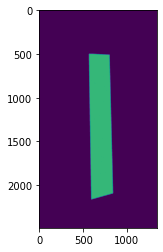

Detecting Regions Finished


In [8]:
imze_male = IMZMLExtract("/mnt/s/data/globus_win/f1fc56fe8e39a9c05328d905d1c4498e/imzML/VAN0010-LK-155-40-IMS_PosMode.imzML")

1 ((1, 1, 1342, 1342), 1)
2 ((501, 2163, 569, 842), 393413)
3 ((2489, 2489, 1, 1), 1)


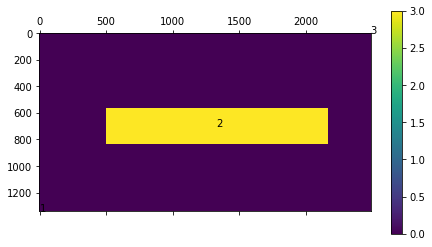

{1: ((1, 1, 1342, 1342), 1),
 2: ((501, 2163, 569, 842), 393413),
 3: ((2489, 2489, 1, 1), 1)}

In [9]:
imze_male.list_regions()

In [10]:
male_spectra2_orig = imze_male.get_region_array(2, makeNullLine=True)

Fetching region range
Fetching region shape
Found region 2 with shape (1663, 274, 61)
Fetching region spectra
100% (393413 of 393413) |################| Elapsed Time: 0:02:01 Time:  0:02:01
100% (393413 of 393413) |################| Elapsed Time: 0:00:04 Time:  0:00:04


In [11]:
male_spectra2_intra = imze_male.normalize_region_array(male_spectra2_orig, normalize="intra_median")
male_spectra2 = imze_male.normalize_region_array(male_spectra2_intra, normalize="inter_median")

Started Log Value: 100.0
100% (1663 of 1663) |####################| Elapsed Time: 0:00:13 Time:  0:00:13
Got 393077 median-enabled pixels
5-Number stats for medians: (455662, 393077, 0.0, 0.6269781461944235, 0.8544891640866873, 1.079016691698337, 2.958079409048938)
Started Log Value: 118.63738632202148
100% (1663 of 1663) |####################| Elapsed Time: 0:00:21 Time:  0:00:21
Got a total of 27795382 fold changes
Median elements [13897691]
Median elements
Global Median 0.79762


Started Log Value: 100.0


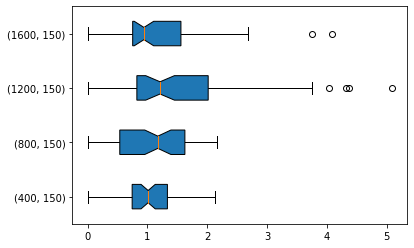

In [9]:
imze_male.plot_fcs(male_spectra2_orig, [(400,150), (800,150), (1200,150), (1600, 150)])

Started Log Value: 148.73923211807815


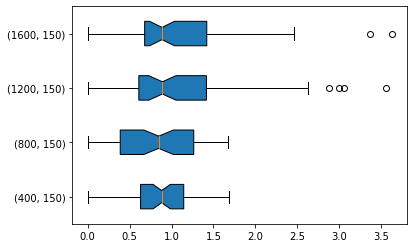

In [12]:
imze_male.plot_fcs(male_spectra2, [(400,150), (800,150), (1200,150), (1600, 150)])

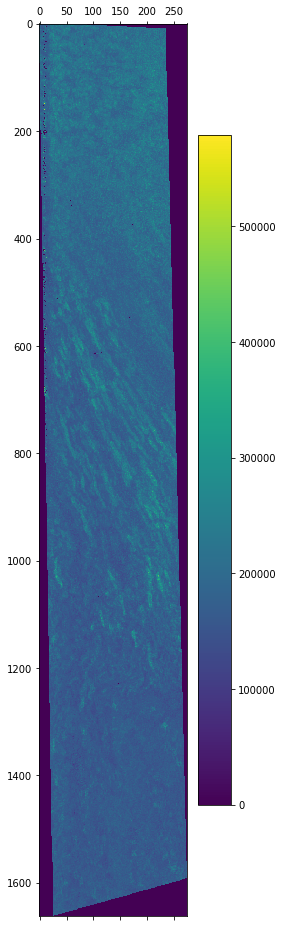

In [13]:
imze_male.plot_toc(male_spectra2)

In [14]:
male_spec = SpectraRegion(np.log(male_spectra2+1), imze_male.mzValues)

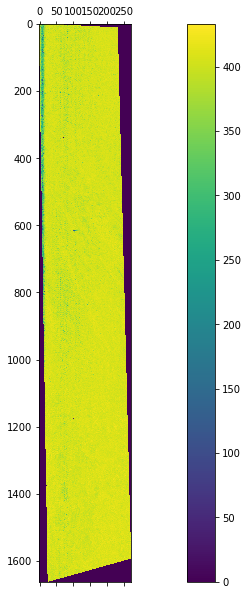

In [15]:
mpl.rcParams['figure.figsize'] = (20,10)
male_spec.plot_tic()
mpl.rcParams['figure.figsize'] = (6,4)

2020-10-01 11:35:02,756  SpectraRegion  INFO: Processing Mass 703 with best existing mass 703.57470703125


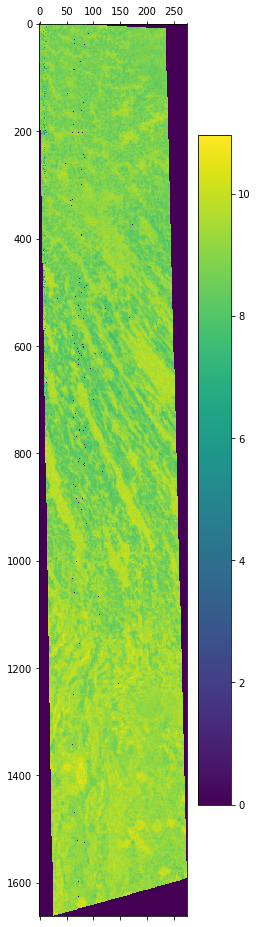

In [16]:
mpl.rcParams['figure.figsize'] = (20,10)
male_spec.mass_heatmap(703)
mpl.rcParams['figure.figsize'] = (6,4)

Note: pairwise similarity needs approx 400GB of RAM ... => UMAP-based reduction

In [17]:
male_spec.segment(method="UMAP_DBSCAN", number_of_regions=15, min_cluster_size=9, num_samples=10000)

2020-10-01 11:35:03,159  SpectraRegion  INFO: Calculating clusters
2020-10-01 11:35:03,160  SpectraRegion  INFO: Elem Matrix of shape: (455662, 61)
2020-10-01 11:35:03,621  SpectraRegion  INFO: UMAP reduction
2020-10-01 11:45:00,472  SpectraRegion  INFO: HDBSCAN reduction
2020-10-01 11:45:00,473  SpectraRegion  INFO: HDBSCAN Clusterer with matrix (10000, 2)
2020-10-01 11:45:00,822  SpectraRegion  INFO: HDBSCAN Soft Clusters with matrix (455662, 2)
2020-10-01 11:50:19,887  SpectraRegion  INFO: HDBSCAN Soft Clusters as output matrix (455662, 137)
2020-10-01 11:50:19,887  SpectraRegion  INFO: HDBSCAN Soft Clusters: (455662, 137)
2020-10-01 11:50:19,889  SpectraRegion  INFO: HDBSCAN Labeling


[[1.54375587e-03 1.23159233e-03 1.36213714e-03 ... 1.90801701e-03
  1.99324919e-03 1.97657270e-03]
 [1.37157533e-05 1.69531280e-05 1.11367181e-05 ... 1.78183254e-05
  1.69548669e-05 1.71303396e-05]
 [6.63890091e-13 5.90857551e-13 5.15853475e-13 ... 9.52644867e-07
  1.38734796e-04 9.28207493e-01]
 ...
 [9.99999996e-01 2.00213349e-11 1.79889857e-11 ... 2.90353768e-11
  2.91894957e-11 2.95586360e-11]
 [9.99999999e-01 1.22051468e-12 1.10094092e-12 ... 1.77324680e-12
  1.78537736e-12 1.80738065e-12]
 [9.99999999e-01 3.69767500e-13 3.34302013e-13 ... 5.31335524e-13
  5.34990976e-13 5.41262300e-13]]


2020-10-01 11:50:20,526  SpectraRegion  INFO: Cluster Reduction for UMAP Result
2020-10-01 11:50:20,527  SpectraRegion  INFO: Cluster Reduction
2020-10-01 11:50:20,528  SpectraRegion  INFO: Calculating consensus spectra
2020-10-01 11:50:21,253  SpectraRegion  INFO: Setting consensus spectra
2020-10-01 11:50:21,254  SpectraRegion  INFO: Calculating consensus spectra done
2020-10-01 11:50:21,601  SpectraRegion  INFO: Calculating clusters done
2020-10-01 11:50:21,848  SpectraRegion  INFO: Calculating clusters saved


array([[15,  7,  4, ..., 10, 10, 10],
       [ 1,  4, 15, ..., 10, 10, 10],
       [ 6,  3,  7, ..., 10, 10, 10],
       ...,
       [10, 10, 10, ..., 10, 10, 10],
       [10, 10, 10, ..., 10, 10, 10],
       [10, 10, 10, ..., 10, 10, 10]], dtype=int16)

In [17]:
#male_spec.redo_hdbscan_on_dimred(number_of_regions=15, min_cluster_size=5, num_samples=1000)

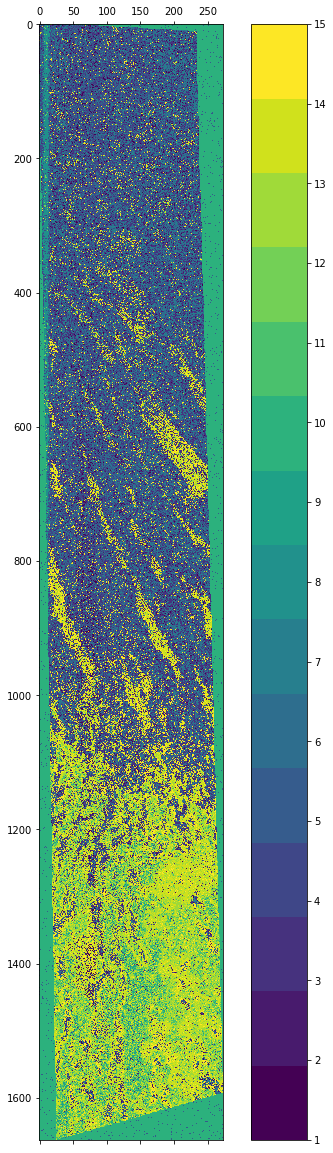

In [18]:
mpl.rcParams['figure.figsize'] = (10,20)
male_spec.plot_segments()

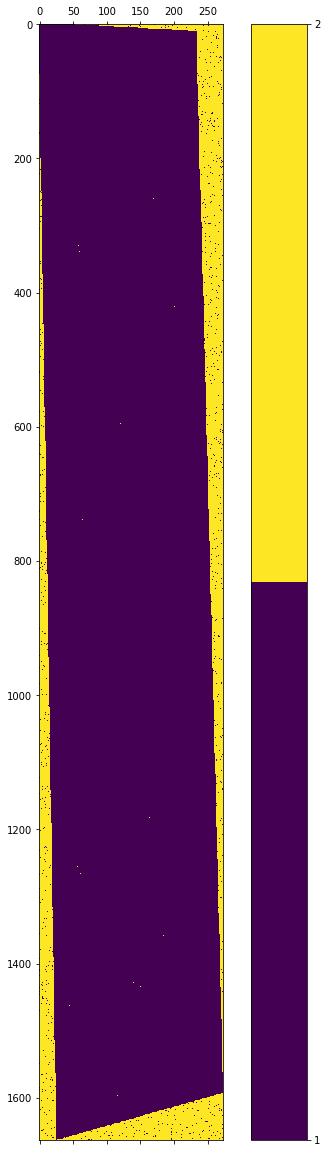

In [20]:
male_spec.plot_segments(highlight=[10])

In [21]:
male_spec.set_background(10)

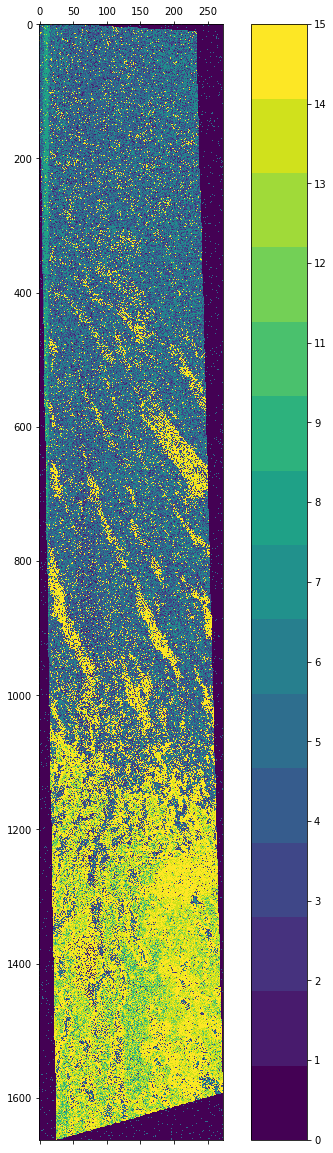

In [22]:
male_spec.plot_segments()

In [23]:
male_spec.list_segment_counts()

0 :  60366
1 :  15050
2 :  10447
3 :  80918
4 :  22319
5 :  25597
6 :  52451
7 :  43276
8 :  5734
9 :  5502
11 :  16057
12 :  722
13 :  34216
14 :  53019
15 :  29988


2020-10-01 13:16:38,081  SpectraRegion  INFO: Pixels    : 455662
2020-10-01 13:16:38,082  SpectraRegion  INFO: Unassigned: 0
/usr/local/lib/python3.8/dist-packages/IPython/core/pylabtools.py:132: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


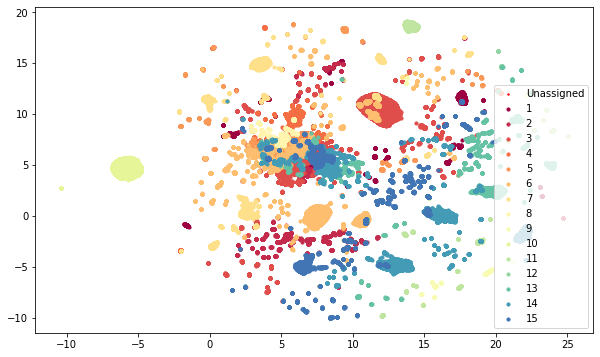

In [24]:
mpl.rcParams['figure.figsize'] = (10,6)
male_spec.vis_umap(legend=True)
mpl.rcParams['figure.figsize'] = (6,4)

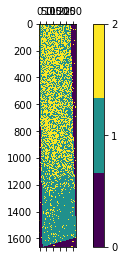

In [26]:
male_spec.plot_segments(highlight=[i for i in range(1,6)])

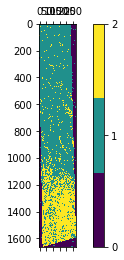

In [28]:
male_spec.plot_segments(highlight=[i for i in range(9,15)])

In [31]:
resdf, expr, pdata = male_spec.find_markers([9,11,12,13,14,15], [i for i in range(1,6)] , use_methods=["ttest"], sample_max = 10000)

2020-10-01 13:29:40,418  SpectraRegion  INFO: DE data for case: [9, 11, 12, 13, 14, 15]
2020-10-01 13:29:40,419  SpectraRegion  INFO: DE data for control: [1, 2, 3, 4, 5]
2020-10-01 13:29:40,419  SpectraRegion  INFO: Running [9, 11, 12, 13, 14, 15] against [1, 2, 3, 4, 5]
2020-10-01 13:29:40,420  SpectraRegion  INFO: DE result key: ((9, 11, 12, 13, 14, 15), (1, 2, 3, 4, 5))
100% (5502 of 5502) |####################| Elapsed Time: 0:00:02 Time:  0:00:02
100% (10000 of 10000) |##################| Elapsed Time: 0:00:07 Time:  0:00:07
100% (722 of 722) |######################| Elapsed Time: 0:00:00 Time:  0:00:00
100% (10000 of 10000) |##################| Elapsed Time: 0:00:12 Time:  0:00:12
100% (10000 of 10000) |##################| Elapsed Time: 0:00:22 Time:  0:00:22
100% (10000 of 10000) |##################| Elapsed Time: 0:00:21 Time:  0:00:21
100% (10000 of 10000) |##################| Elapsed Time: 0:00:39 Time:  0:00:39
100% (10000 of 10000) |##################| Elapsed Time: 0:00:5

In [39]:
resdf = male_spec.get_de_result("ttest", ((9, 11, 12, 13, 14, 15), (1, 2, 3, 4, 5)))

In [45]:
annotDF = male_spec.deres_to_df(resdf, ((9, 11, 12, 13, 14, 15), (1, 2, 3, 4, 5)), None, keepOnlyProteins=False, inverse_fc=False)

2020-10-01 16:27:29,912  SpectraRegion  INFO: DE result for case ((9, 11, 12, 13, 14, 15), (1, 2, 3, 4, 5)) with (61, 7) results
2020-10-01 16:27:29,913  SpectraRegion  INFO: DF column names ['gene', 'pval', 'qval', 'log2fc', 'mean', 'zero_mean', 'zero_variance']
2020-10-01 16:27:29,915  SpectraRegion  INFO: DE result for case ((9, 11, 12, 13, 14, 15), (1, 2, 3, 4, 5)) with (5, 7) results (filtered)
2020-10-01 16:27:30,466  SpectraRegion  INFO: Created matrices with shape (139504, 61) and (154331, 61) (target, bg)


In [46]:
annotDF

,clusterID,gene_ident,gene_mass,gene,protein_mass,avg_logFC,qvalue,num,anum,mean,median,num_bg,anum_bg,mean_bg,median_bg
0,9_11_12_13_14_15,mass_729_5904,729.5904,,-1,-0.726301,0.0,139504,132245,5.120042,5.449082,154331,111564,3.451078,4.609216
1,9_11_12_13_14_15,mass_757_6222,757.6222,,-1,-1.217707,0.0,139504,131716,4.923086,5.285525,154331,43572,1.366994,0.000000
2,9_11_12_13_14_15,mass_794_6056,794.6056,,-1,0.828504,0.0,139504,94219,3.904462,5.416899,154331,143118,5.765380,6.231617
3,9_11_12_13_14_15,mass_805_6799,805.6799,,-1,1.511249,0.0,139504,64174,2.199309,0.000000,154331,141475,5.214868,5.690598
4,9_11_12_13_14_15,mass_833_7094,833.7094,,-1,1.621841,0.0,139504,60996,2.086445,0.000000,154331,143720,5.362381,5.762806


2020-10-01 16:28:08,333  SpectraRegion  INFO: Processing Mass 729 with best existing mass 729.5903930664062


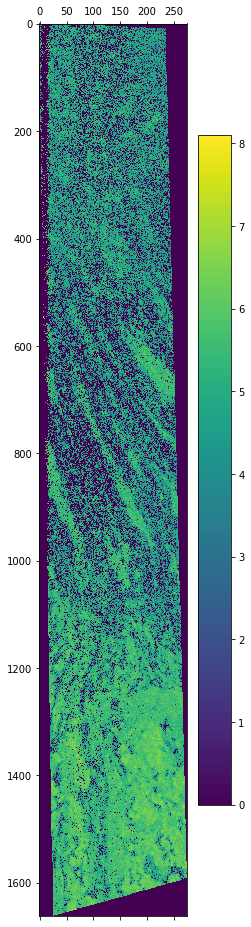

array([[5.18591428, 5.20971328, 6.35806011, ..., 0.        , 0.        ,
        0.        ],
       [5.33235055, 5.08854394, 5.68432463, ..., 0.        , 0.        ,
        0.        ],
       [5.71601701, 5.31475693, 5.48390615, ..., 0.        , 0.        ,
        0.        ],
       ...,
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ]])

In [47]:
male_spec.mass_heatmap(729)

2020-10-01 16:28:26,323  SpectraRegion  INFO: Processing Mass 833 with best existing mass 833.7094116210938


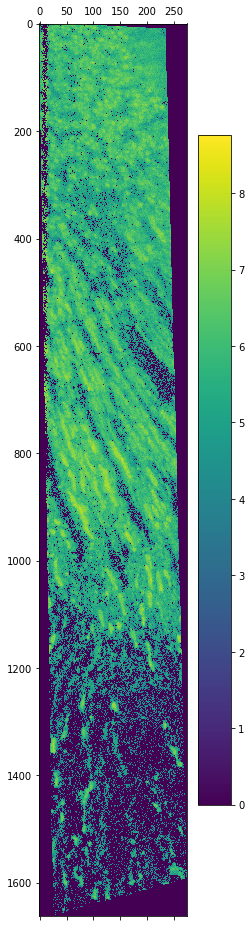

array([[3.662996  , 4.89330618, 5.71300692, ..., 0.        , 0.        ,
        0.        ],
       [4.98884137, 5.64292171, 4.73682458, ..., 0.        , 0.        ,
        0.        ],
       [5.51713113, 5.20342123, 5.03182007, ..., 0.        , 0.        ,
        0.        ],
       ...,
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ]])

In [48]:
male_spec.mass_heatmap(833)

In [48]:
! ls /mnt/s/data/globus_win/d9e3c80a32567cde9b61e38ce8693559/imzML

VAN0005-RK-4-172-IMS_PosMode.ibd    VAN0005-RK-4-172-IMS_PosMode.imzML.regions
VAN0005-RK-4-172-IMS_PosMode.imzML


In [25]:
! rm /mnt/s/data/globus_win/d9e3c80a32567cde9b61e38ce8693559/imzML/VAN0005-RK-4-172-IMS_PosMode.imzML.regions

Detecting Regions
Detecting Regions


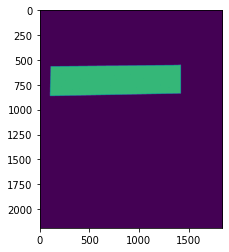

Detecting Regions Finished
Detecting Regions Finished


In [26]:
imze_female = IMZMLExtract("/mnt/s/data/globus_win/d9e3c80a32567cde9b61e38ce8693559/imzML/VAN0005-RK-4-172-IMS_PosMode.imzML")

1 ((1, 1, 1840, 1840), 1)
2 ((551, 862, 101, 1416), 381928)
3 ((2189, 2189, 1, 1), 1)


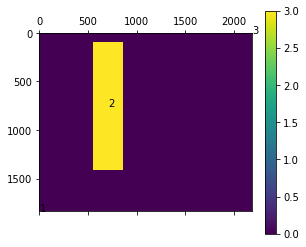

{1: ((1, 1, 1840, 1840), 1),
 2: ((551, 862, 101, 1416), 381928),
 3: ((2189, 2189, 1, 1), 1)}

In [27]:
imze_female.list_regions()

In [28]:
female_spectra2_orig = imze_female.get_region_array(2, makeNullLine=True)

Fetching region range
Fetching region range
Fetching region shape
Fetching region shape
Found region 2 with shape (312, 1316, 61)
Found region 2 with shape (312, 1316, 61)
Fetching region spectra
Fetching region spectra
100% (381928 of 381928) |################| Elapsed Time: 0:01:40 Time:  0:01:40
100% (381928 of 381928) |################| Elapsed Time: 0:00:03 Time:  0:00:03


In [31]:
female_spectra2_intra = imze_female.normalize_region_array(female_spectra2_orig, normalize="intra_median")
female_spectra2 = imze_female.normalize_region_array(female_spectra2_intra, normalize="inter_median")

Started Log Value: 66.0
Started Log Value: 66.0
100% (312 of 312) |######################| Elapsed Time: 0:00:11 Time:  0:00:11
Got 381925 median-enabled pixels
Got 381925 median-enabled pixels
5-Number stats for medians: (410592, 381925, 0.0, 0.6666666666666666, 0.8616600790513834, 1.0712328767123287, 2.458563535911602)
5-Number stats for medians: (410592, 381925, 0.0, 0.6666666666666666, 0.8616600790513834, 1.0712328767123287, 2.458563535911602)
Started Log Value: 81.0
Started Log Value: 81.0
100% (312 of 312) |######################| Elapsed Time: 0:00:17 Time:  0:00:17
Got a total of 25046112 fold changes
Got a total of 25046112 fold changes
Median elements [12523056]
Median elements [12523056]
Median elements
Median elements
Global Median 0.82702
Global Median 0.82702


In [32]:
female_spectra2_orig.shape

(312, 1316, 61)

Started Log Value: 66.0
Started Log Value: 66.0


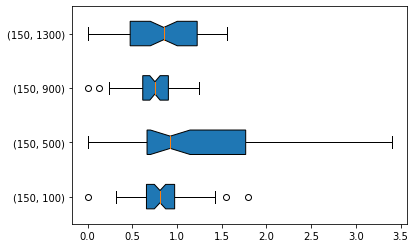

In [33]:
imze_female.plot_fcs(female_spectra2_orig, [(150,100), (150,500), (150,900), (150, 1300)])

Started Log Value: 97.94200865758991
Started Log Value: 97.94200865758991


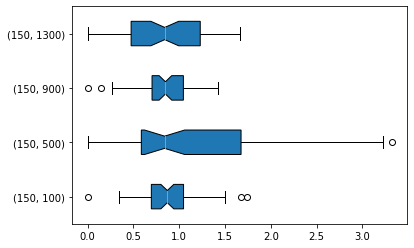

In [34]:
imze_female.plot_fcs(female_spectra2, [(150,100), (150,500), (150,900), (150, 1300)])

In [35]:
female_spec = SpectraRegion(np.log(female_spectra2+1), imze_female.mzValues)

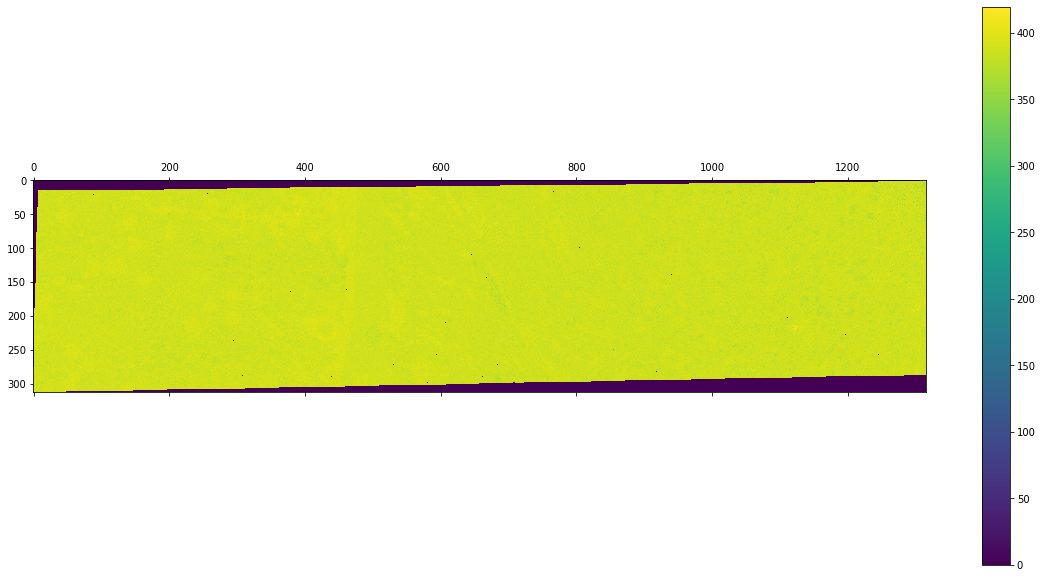

In [36]:
mpl.rcParams['figure.figsize'] = (20,10)
female_spec.plot_tic()
mpl.rcParams['figure.figsize'] = (6,4)

Note: pairwise similarity needs approx 400GB of RAM ... => UMAP-based reduction

In [49]:
female_spec.segment(method="UMAP_DBSCAN", number_of_regions=15, min_cluster_size=9, num_samples=10000)

2020-09-29 20:34:44,003  SpectraRegion  INFO: Calculating clusters
2020-09-29 20:34:44,004  SpectraRegion  INFO: Elem Matrix of shape: (410592, 61)
2020-09-29 20:34:44,375  SpectraRegion  INFO: UMAP reduction
2020-09-29 20:43:10,632  SpectraRegion  INFO: HDBSCAN reduction
2020-09-29 20:43:10,633  SpectraRegion  INFO: HDBSCAN Clusterer with matrix (10000, 2)
2020-09-29 20:43:10,970  SpectraRegion  INFO: HDBSCAN Soft Clusters with matrix (410592, 2)
2020-09-29 20:46:53,006  SpectraRegion  INFO: HDBSCAN Soft Clusters as output matrix (410592, 146)
2020-09-29 20:46:53,007  SpectraRegion  INFO: HDBSCAN Soft Clusters: (410592, 146)
2020-09-29 20:46:53,008  SpectraRegion  INFO: HDBSCAN Labeling


[[4.55113537e-01 8.46179705e-04 8.52835050e-04 ... 9.85487909e-04
  9.74924769e-04 9.69159661e-04]
 [5.12094960e-01 7.76831878e-04 7.82796976e-04 ... 9.07623743e-04
  8.97766943e-04 8.92534041e-04]
 [5.17049423e-02 1.55010618e-03 1.56278985e-03 ... 1.81556799e-03
  1.79520953e-03 1.78400167e-03]
 ...
 [9.99999999e-01 0.00000000e+00 0.00000000e+00 ... 0.00000000e+00
  0.00000000e+00 0.00000000e+00]
 [9.99999999e-01 8.70843222e-24 8.77681807e-24 ... 1.01495537e-23
  1.00403195e-23 9.98091536e-24]
 [9.99999491e-01 2.45074904e-09 2.47069733e-09 ... 2.86084447e-09
  2.82945094e-09 2.81204063e-09]]


2020-09-29 20:46:53,606  SpectraRegion  INFO: Cluster Reduction for UMAP Result
2020-09-29 20:46:53,606  SpectraRegion  INFO: Cluster Reduction
2020-09-29 20:46:53,607  SpectraRegion  INFO: Calculating consensus spectra
2020-09-29 20:46:54,253  SpectraRegion  INFO: Setting consensus spectra
2020-09-29 20:46:54,254  SpectraRegion  INFO: Calculating consensus spectra done
2020-09-29 20:46:54,611  SpectraRegion  INFO: Calculating clusters done
2020-09-29 20:46:54,822  SpectraRegion  INFO: Calculating clusters saved


array([[15, 15, 15, ...,  1,  3,  1],
       [15, 15, 15, ...,  1,  4,  1],
       [15, 15, 15, ...,  4,  2,  1],
       ...,
       [10,  6, 12, ..., 15, 15, 15],
       [12, 12, 12, ..., 15, 15, 15],
       [ 5,  6, 12, ..., 15, 15, 15]], dtype=int16)

In [ ]:
#female_spec.redo_hdbscan_on_dimred(number_of_regions=15, min_cluster_size=5, num_samples=20000)

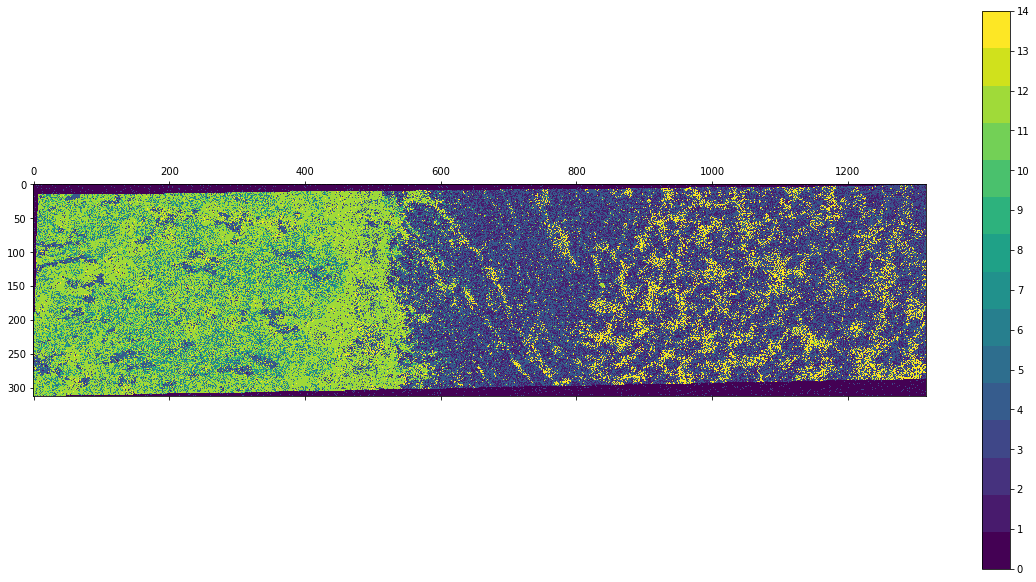

In [53]:
mpl.rcParams['figure.figsize'] = (20,10)

female_spec.plot_segments()

In [51]:
female_spec.set_background(15)

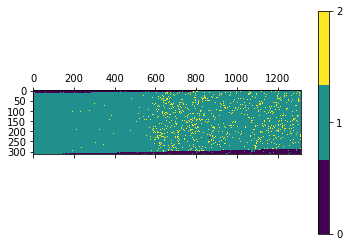

In [52]:
female_spec.plot_segments(highlight=2)

In [54]:
female_spec.list_segment_counts()

0 :  27128
1 :  62118
2 :  18791
3 :  15248
4 :  118310
5 :  2000
6 :  15412
7 :  2777
8 :  3487
9 :  14355
10 :  3236
11 :  3932
12 :  86646
13 :  8919
14 :  28233


2020-09-29 20:47:43,616  SpectraRegion  INFO: Pixels    : 410592
2020-09-29 20:47:43,617  SpectraRegion  INFO: Unassigned: 0


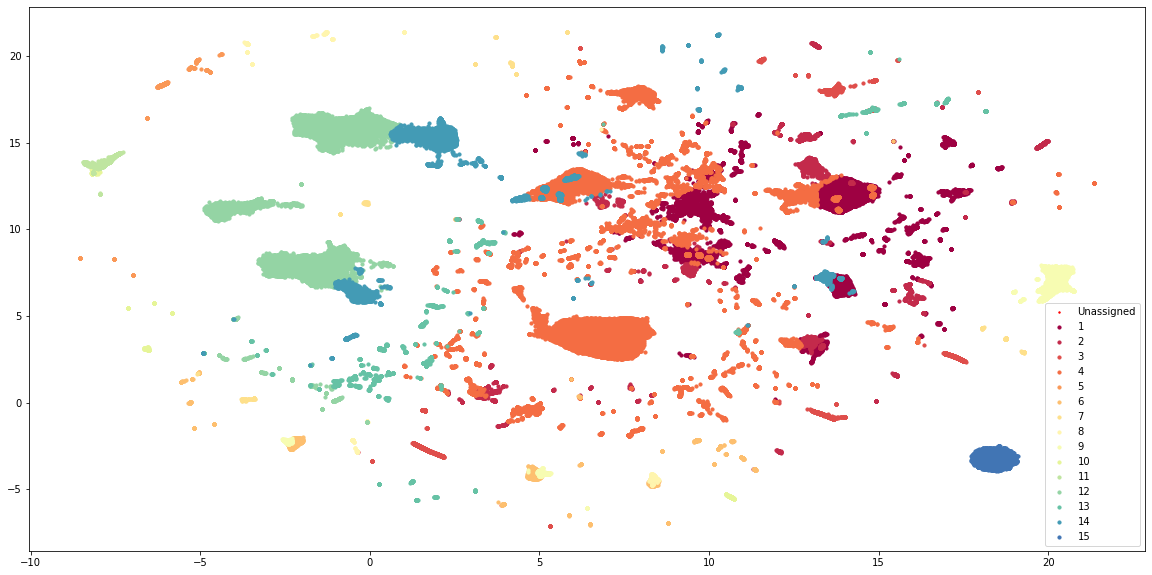

In [55]:
mpl.rcParams['figure.figsize'] = (20,10)
female_spec.vis_umap(legend=True)
mpl.rcParams['figure.figsize'] = (6,4)

In [56]:
combSpec = CombinedSpectra({"male": male_spec, "female": female_spec})

In [57]:
combSpec.consensus_similarity()

2020-09-29 21:14:15,179  SpectraRegion  INFO: Calculating consensus spectra
2020-09-29 21:14:15,863  SpectraRegion  INFO: Setting consensus spectra
2020-09-29 21:14:15,864  SpectraRegion  INFO: Calculating consensus spectra done
2020-09-29 21:14:15,883  SpectraRegion  INFO: Calculating consensus spectra
2020-09-29 21:14:16,502  SpectraRegion  INFO: Setting consensus spectra
2020-09-29 21:14:16,503  SpectraRegion  INFO: Calculating consensus spectra done


In [58]:
combSpec.consensus_similarity_matrix

,"(female, 0)","(female, 1)","(female, 2)","(female, 3)","(female, 4)","(female, 5)","(female, 6)","(female, 7)","(female, 8)","(female, 9)",...,"(male, 5)","(male, 6)","(male, 7)","(male, 8)","(male, 9)","(male, 10)","(male, 11)","(male, 12)","(male, 13)","(male, 14)"
"(female, 0)",1.000000,0.365186,0.370057,0.351026,0.363618,0.361311,0.360072,0.361673,0.361221,0.357726,...,0.354797,0.355368,0.362029,0.361985,0.365581,0.370068,0.368206,0.381416,0.376983,0.408095
"(female, 1)",0.365186,1.000000,0.999073,0.996094,0.998528,0.979388,0.981235,0.981750,0.976013,0.987537,...,0.975586,0.993165,0.997640,0.996602,0.998738,0.998463,0.998357,0.994652,0.997047,0.968498
"(female, 2)",0.370057,0.999073,1.000000,0.995296,0.998585,0.977540,0.978710,0.979030,0.973176,0.985860,...,0.972624,0.991226,0.996617,0.995238,0.998210,0.998395,0.999061,0.995856,0.998196,0.968295
"(female, 3)",0.351026,0.996094,0.995296,1.000000,0.996922,0.982641,0.985716,0.986503,0.980981,0.990165,...,0.981519,0.995765,0.997818,0.997194,0.996684,0.995225,0.994803,0.987111,0.991216,0.957656
"(female, 4)",0.363618,0.998528,0.998585,0.996922,1.000000,0.981523,0.983734,0.984341,0.979041,0.989061,...,0.978694,0.994741,0.998351,0.997885,0.998894,0.997417,0.998638,0.992805,0.995999,0.966551
"(female, 5)",0.361311,0.979388,0.977540,0.982641,0.981523,1.000000,0.993424,0.988519,0.994357,0.993845,...,0.989626,0.989278,0.983640,0.984722,0.982878,0.978187,0.977213,0.966009,0.971317,0.934491
"(female, 6)",0.360072,0.981235,0.978710,0.985716,0.983734,0.993424,1.000000,0.994800,0.998862,0.997434,...,0.998702,0.995208,0.986565,0.990081,0.986033,0.980191,0.979017,0.967135,0.972714,0.937224
"(female, 7)",0.361673,0.981750,0.979030,0.986503,0.984341,0.988519,0.994800,1.000000,0.994405,0.989573,...,0.995011,0.994945,0.986294,0.990924,0.984758,0.980087,0.978795,0.966574,0.972242,0.937824
"(female, 8)",0.361221,0.976013,0.973176,0.980981,0.979041,0.994357,0.998862,0.994405,1.000000,0.994161,...,0.998629,0.992416,0.981540,0.986443,0.981443,0.974576,0.973557,0.960945,0.966917,0.933494
"(female, 9)",0.357726,0.987537,0.985860,0.990165,0.989061,0.993845,0.997434,0.989573,0.994161,1.000000,...,0.993482,0.995353,0.991618,0.992075,0.991049,0.986846,0.985936,0.975864,0.980744,0.943105


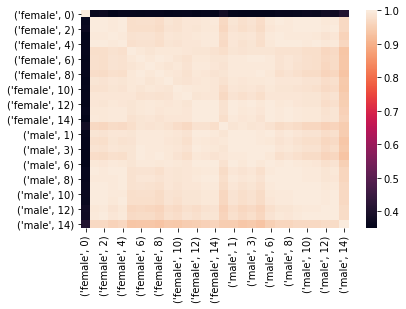

In [59]:
combSpec.plot_consensus_similarity()

/usr/local/lib/python3.8/dist-packages/matplotlib/colors.py:263: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  c = np.array(c)


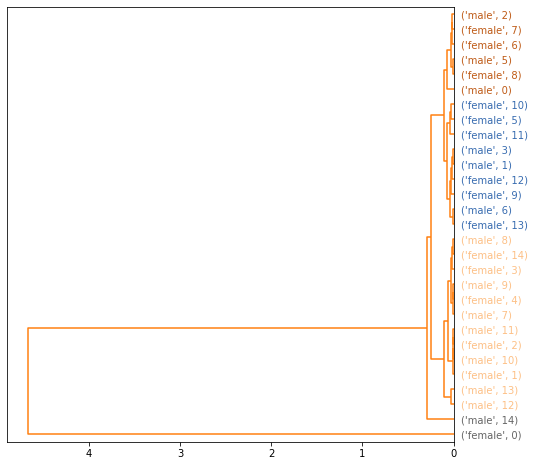

In [60]:
combSpec.cluster_concensus_spectra(number_of_clusters=5)

{0: 3, 1: 2, 2: 3, 3: 2, 5: 3, 6: 2, 7: 1, 8: 1, 9: 1, 10: 1, 11: 1, 12: 1, 13: 1, 14: 4}
{0: 5, 1: 1, 2: 1, 3: 1, 4: 1, 5: 2, 6: 3, 7: 3, 8: 3, 9: 2, 10: 2, 11: 2, 12: 2, 13: 2, 14: 1}
{1.0: 1.0, 2.0: 2.0, 3.0: 3.0, 4.0: 4.0, 5.0: 5.0}


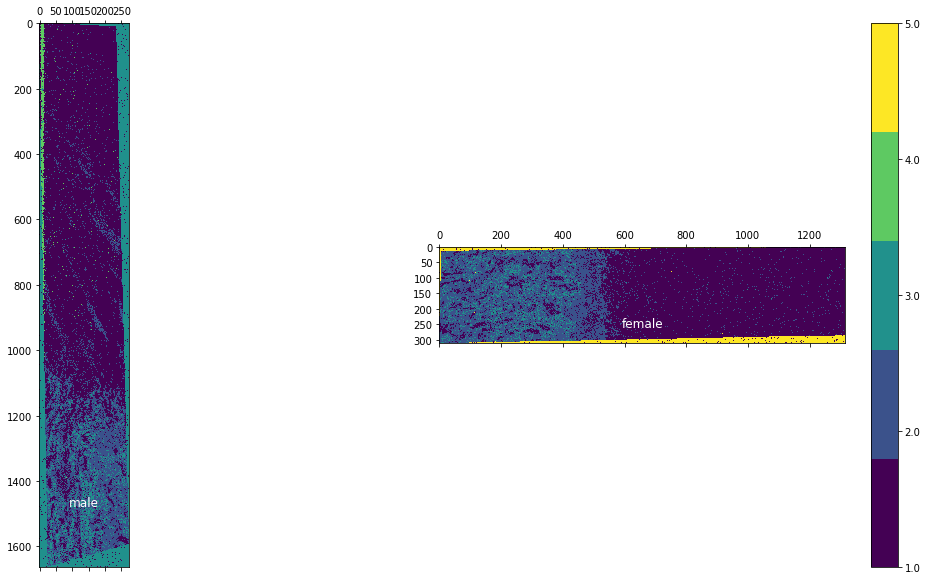

In [66]:
mpl.rcParams['figure.figsize'] = (20,10)
combSpec.plot_common_segments()
mpl.rcParams['figure.figsize'] = (6,4)

In [70]:
male_clus = tuple(sorted([x for x in np.unique(male_spec.segmented) if x > 0]))
female_clus = tuple(sorted([x for x in np.unique(female_spec.segmented) if x > 0]))

In [68]:
resdf, expr, pdata = combSpec.find_markers("male", male_clus, "female", [x for x in np.unique(female_spec.segmented) if x > 0], None, sample_max=10000, scaled=False)

2020-09-29 21:44:16,350  CombinedSpectra  INFO: DE data for case: male [1, 2, 3, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14]
2020-09-29 21:44:16,351  CombinedSpectra  INFO: DE data for control: female [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14]
2020-09-29 21:44:16,352  CombinedSpectra  INFO: Processing region male cluster: 1
  7% (689 of 9061) |#                    | Elapsed Time: 0:00:00 ETA:   0:00:02

Running male [1, 2, 3, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14] against female [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14]


100% (9061 of 9061) |####################| Elapsed Time: 0:00:04 Time:  0:00:04
2020-09-29 21:44:20,499  CombinedSpectra  INFO: Processing region male cluster: 2
100% (4910 of 4910) |####################| Elapsed Time: 0:00:03 Time:  0:00:03
2020-09-29 21:44:24,441  CombinedSpectra  INFO: Processing region male cluster: 3
100% (10000 of 10000) |##################| Elapsed Time: 0:00:10 Time:  0:00:10
2020-09-29 21:44:35,061  CombinedSpectra  INFO: Processing region male cluster: 5
100% (10000 of 10000) |##################| Elapsed Time: 0:00:19 Time:  0:00:19
2020-09-29 21:44:54,166  CombinedSpectra  INFO: Processing region male cluster: 6
100% (10000 of 10000) |##################| Elapsed Time: 0:00:18 Time:  0:00:18
2020-09-29 21:45:12,548  CombinedSpectra  INFO: Processing region male cluster: 7
100% (10000 of 10000) |##################| Elapsed Time: 0:00:29 Time:  0:00:29
2020-09-29 21:45:42,525  CombinedSpectra  INFO: Processing region male cluster: 8
100% (10000 of 10000) |#####

In [71]:
expkey=('male', male_clus, 'female', female_clus)
deresdf = resdf["rank"][expkey]

In [72]:
deresdf

,clusterID,gene_ident,gene_mass,gene,protein_mass,avg_logFC,qvalue,num,anum,mean,median,num_bg,anum_bg,mean_bg,median_bg


In [ ]:
combSpec.mass_intensity(818.5443, scaled=False)

In [ ]:
mpl.rcParams['figure.figsize'] = (20,10)
_ = combSpec.mass_heatmap(818.5443, scaled=False)
mpl.rcParams['figure.figsize'] = (6,4)

In [ ]:
from adjustText import adjust_text

In [ ]:
plt.figure(figsize=(16,10))
xydots = [(x,y) for x,y in zip(list(-deresdf["avg_logFC"]), list(-np.log10(deresdf["qvalue"])))]
dotgene = list(deresdf["gene_mass"])
texts = []
seenProts = set()
allYValues = set()
for i in range(len(xydots)):
    x = xydots[i][0]
    y = xydots[i][1]
    
    if y > 100:
        y = 100
        
    allYValues.add(y)
    
    if not dotgene[i] in seenProts and abs(y) >= 10 and abs(x) >= 0.5:
        texts.append(plt.text(x * (1 + 0.01), y * (1 + 0.01) , dotgene[i], fontsize=12))
        plt.plot(x, y, 'ro')
        seenProts.add(dotgene[i])
    else:
        plt.plot(x, y, 'bo')

plt.ylim((0, 10+max(allYValues)))
        
if len(texts) > 0:
    adjust_text(texts, force_points=0.2, force_text=0.2, expand_points=(1, 1), expand_text=(1, 1), arrowprops=dict(arrowstyle="-", color='black', lw=0.5))
plt.show()